#### 本日作業：

#### 透過 Kaggle 的實戰練習，把資料下載下來，自己做訓練集/測試集的切分，送進模型訓練，評估結果，再把測試集的答案上傳到 Kaggle 得到最終成績。
#### 請完成 scikit-learn-practice 比賽(點擊連結可至競賽頁面)，讓大家熟悉 Scikit-learn 的比賽
* 總共有一千筆訓練資料、40個 features，二元分類問題，練習 features scaling、建模、調參數等步驟
* 每天最多上傳 10 次結果
* 請在 private / public leaderboard 上取得 0.7 以上的準確率
* 可多參考別人的 Kernel，學習別人的寫法與思路，完成自己的 Kaggle 競賽


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_df = pd.read_csv('../../.././data3/train.csv',header = None)
train_label = pd.read_csv('../../.././data3/trainLabels.csv',header = None)
test_df = pd.read_csv('../../.././data3/test.csv',header = None)
train_label.columns = ['Solution']

In [3]:
train_df.shape

(1000, 40)

In [4]:
def CheckMissingVals(data):
    for col in data.columns:
        if np.sum(data[col].isnull()) > 0:
            print(f' {col} missing NAs : {np.sum(data[col].isnull())} ')

In [5]:
#Check the training data
CheckMissingVals(train_df)
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


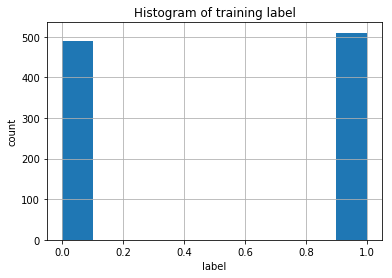

,Solution
count,1000.00000
mean,0.51000
std,0.50015
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [6]:
#Check the training label

train_label.hist()
plt.title('Histogram of training label')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

train_label.describe()

In [7]:
#Check the testing data

CheckMissingVals(test_df)
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.011814,0.004261,-0.001708,0.008614,1.262429,0.006003,0.480585,-0.017228,0.006883,-0.006664,...,-0.018914,0.007282,-0.476895,0.016175,-0.508713,-0.002295,0.451234,-0.002042,-1.003258,0.539873
std,1.009514,1.011432,0.996685,0.989010,4.527492,0.999623,2.102394,2.204673,0.989207,0.991570,...,1.003450,1.003326,2.202519,1.015779,2.097448,1.008415,2.187677,1.000152,1.979629,2.011646
min,-3.568633,-4.238067,-3.587473,-3.646144,-17.296514,-3.500646,-9.157707,-7.867021,-4.037177,-3.666707,...,-4.545617,-3.914329,-8.510309,-4.702577,-8.860839,-3.579675,-9.034930,-3.820679,-8.174851,-7.945400
25%,-0.669886,-0.678792,-0.665240,-0.662560,-1.669099,-0.688766,-0.894049,-1.521762,-0.654169,-0.665439,...,-0.689220,-0.664532,-1.986040,-0.673810,-1.908190,-0.689363,-1.071005,-0.667359,-2.293291,-0.717376
50%,0.006104,0.010758,0.007384,0.009027,1.123982,0.011476,0.534536,-0.021020,-0.006291,-0.005408,...,-0.033990,-0.003370,-0.459278,0.013170,-0.481508,-0.000858,0.419585,-0.003255,-1.004007,0.637040
75%,0.703350,0.684755,0.658111,0.683506,4.002391,0.690966,1.890960,1.460165,0.676678,0.654349,...,0.655757,0.682167,1.026158,0.691832,0.957351,0.666330,1.938350,0.667539,0.321595,1.897324
max,3.843549,3.538868,3.716102,3.667817,20.551947,4.565496,7.882210,7.391208,3.706671,3.322649,...,3.624639,4.251316,8.598575,4.157051,6.851583,3.911722,8.624332,3.860112,7.125848,9.464492


In [8]:
total_df = pd.concat([train_df , test_df] , axis = 0)
CheckMissingVals(total_df)
total_df.shape

(10000, 40)

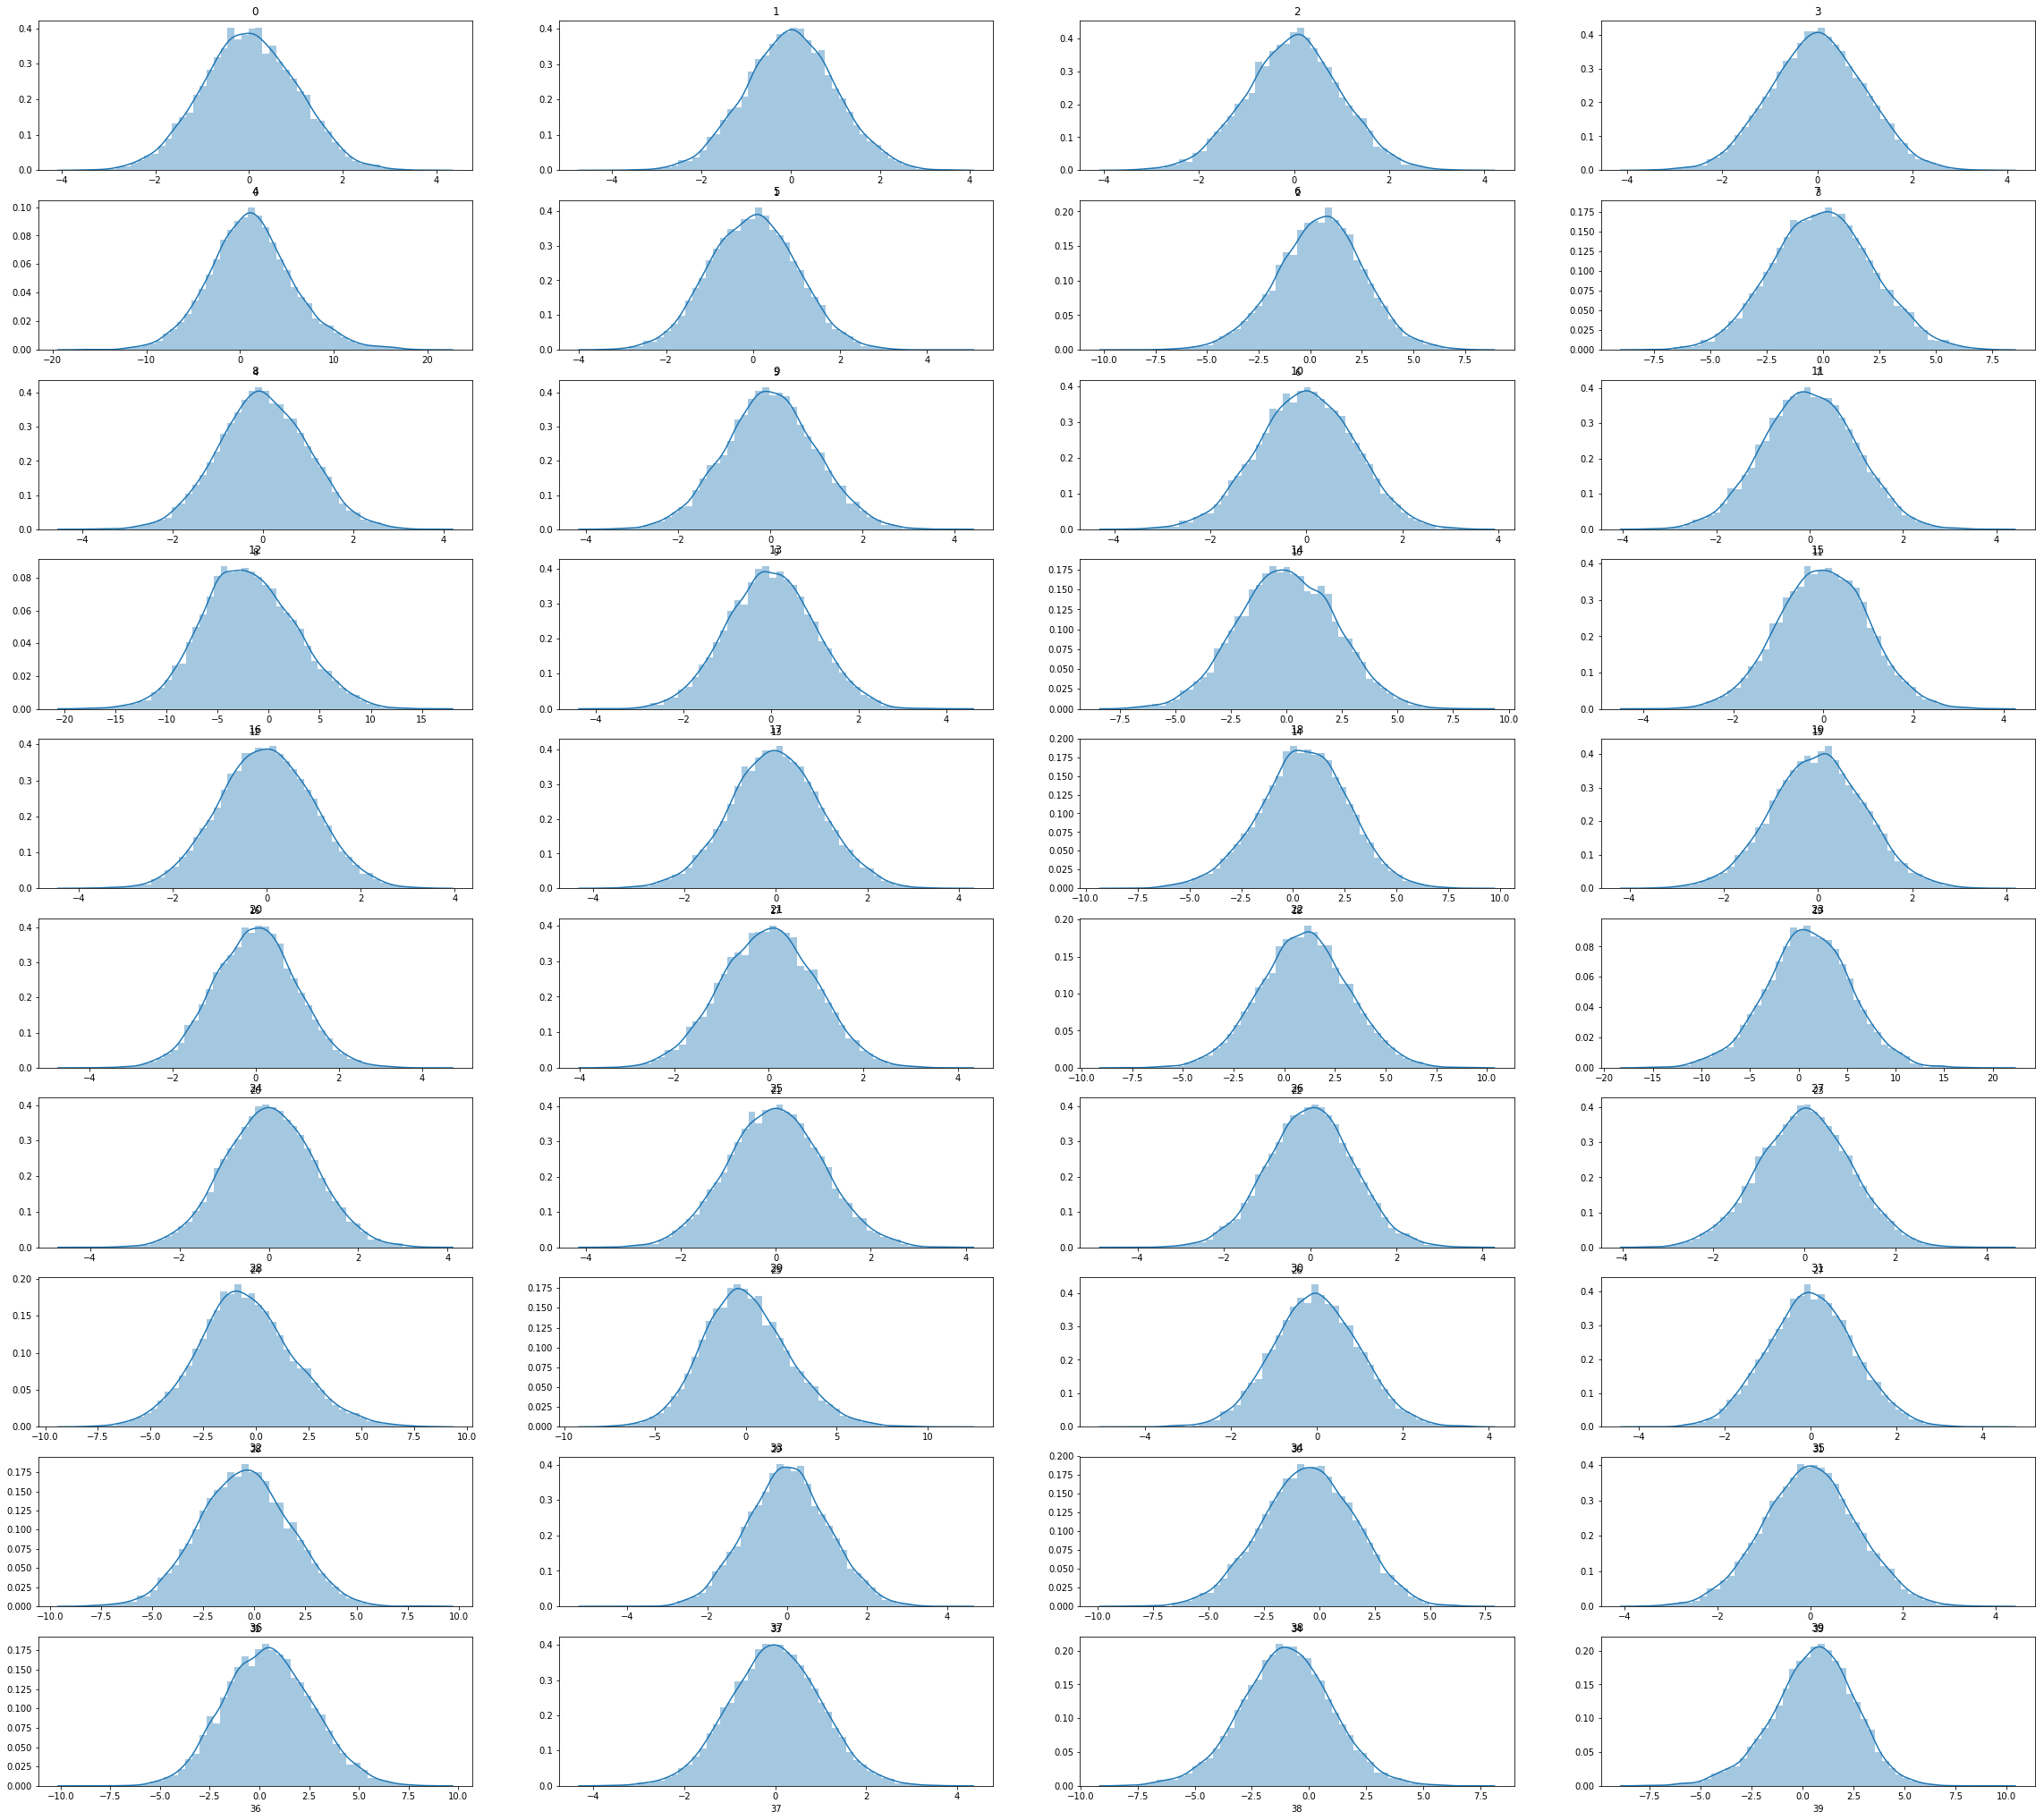

In [9]:
#Check the data distribution of each feature
plt.figure(figsize = (40,40))

ncols = 4
nrows = len(total_df.columns) / ncols  + 1

for i,col in enumerate(total_df.columns):
    plt.subplot(nrows , ncols , i+1)
    plt.title(col)
    sns.distplot(total_df[col])
plt.show()

In [10]:
correlation_df = pd.concat([train_df,train_label],axis = 1)
correlation = pd.DataFrame(abs(correlation_df.corr()['Solution']).values, index = correlation_df.columns, columns = ['Correlation'])
correlation = correlation.Correlation.sort_values(ascending = False)
correlation

Solution    1.000000
14          0.476171
12          0.460738
18          0.289508
39          0.264656
6           0.252976
34          0.236116
36          0.231733
32          0.227027
28          0.207949
23          0.172938
4           0.150652
11          0.075276
20          0.075135
26          0.064633
15          0.060556
33          0.053928
1           0.052153
22          0.046953
19          0.046036
7           0.040523
37          0.039376
8           0.037534
25          0.036663
0           0.028058
9           0.026841
27          0.019778
38          0.019690
21          0.018645
13          0.018214
17          0.018021
24          0.017121
30          0.015797
5           0.015151
35          0.012533
31          0.012458
16          0.012234
29          0.012022
10          0.010233
3           0.007439
2           0.005618
Name: Correlation, dtype: float64

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

train_x = total_df[:len(train_df)]
test_x = total_df[len(train_df):]

clf = GradientBoostingClassifier()

x_train, x_test, y_train, y_test = train_test_split(train_x,train_label, test_size = 0.2, random_state = 2019)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

print(f' Accuracy with non-tuned classifier : {metrics.accuracy_score(pred,y_test)}')

C:\Users\lincecum\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Accuracy with non-tuned classifier : 0.865


In [18]:
from sklearn.model_selection import RandomizedSearchCV

def tuneParamsRandom(classifier, params, train_x, train_y, cv = 5):
    rs = RandomizedSearchCV(classifier, params, n_iter = 30, scoring = 'accuracy', n_jobs = -1, verbose = 0)
    rs.fit(train_x, train_y)
    return rs.best_params_, rs.best_score_


gbcParams = {'n_estimators' : np.arange(100,2000,50) , 'learning_rate' : np.arange(0.01,0.2,0.02) , 
             'min_samples_split' : np.arange(2,20,2), 'min_samples_leaf' : np.arange(1,6,2),
             'max_depth' : np.arange(3,11,2) }


gbc_best_params, gbc_best_score = tuneParamsRandom(clf, gbcParams, train_x, train_label)
print(f' GradientBoostingClassifier : {gbc_best_params} , {gbc_best_score} ')

C:\Users\lincecum\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\lincecum\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 GradientBoostingClassifier : {'n_estimators': 1450, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.12999999999999998} , 0.891 


In [19]:
clf.set_params(**gbc_best_params)
clf.fit(train_x,train_label)

prediction = clf.predict(test_x)
prediction[:10]

C:\Users\lincecum\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [21]:
output = pd.DataFrame({'Id' : np.arange(1,len(test_x)+1,1), 'Solution' : prediction})
output.head(10)

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [22]:
output.to_csv('Submission.csv', index = False)